### Challenge: Analyzing Text about Data Science
#### Goal: 
We will be doing a text mining activity where by we will be checking data from wikipedia website

In [3]:
url = 'https://en.wikipedia.org/wiki/Data_science'

### Step 1: Getting The Data
First step we will use requests library to do that:

In [4]:
import requests

text = requests.get(url).content.decode('utf-8')
print(text[:1000])

<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>Data science - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"7e223f81-0eb9-4416-94be-d16a6c79fb8e","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Data_science","wgTitle":"Data science","wgCurRevisionId":1095201652,"wgRevisionId":1095201652,"wgArticleId":35458904,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles with short description","Short description matches Wikidata","Use dmy dates from August 2021","Information science","Computer occupations","Comput

## Transforming the Data
The next step is to convert the data into the form suitable for processing. In our case, we have downloaded HTML source from the page, and we need to convert it into plain text.
<br/>
There are many ways this can be done. We will use the simplest built-in HTMLParser object from python. We need to subclass the HTMLParser class and define the code that we will collect all the inside HTML tags, except <script> and <style> tags

In [5]:
from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    script = False
    res = ""
    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script", "style"]:
            self.script = True
    def handle_endtag(self, tag):
        if tag.lower() in ["script", "style"]:
            self.script = False
    def handle_data(self, data):
        if str.strip(data)=="" or self.script:
            return 
        self.res += ' ' + data.replace('[ edit ]', '')

parser = MyHTMLParser()
parser.feed(text)
text = parser.res
print(text[:1000])

 Data science - Wikipedia Data science From Wikipedia, the free encyclopedia Jump to navigation Jump to search Interdisciplinary field of study focused on deriving knowledge and insights from data Not to be confused with  information science . The existence of  Comet NEOWISE  (here depicted as a series of red dots) was discovered by analyzing  astronomical survey  data acquired by a  space telescope , the  Wide-field Infrared Survey Explorer . Data science  is an  interdisciplinary  field that uses  scientific methods , processes,  algorithms  and systems to extract  knowledge  and insights from noisy, structured and  unstructured data , [1] [2]  and apply knowledge from data across a broad range of application domains. Data science is related to  data mining ,  machine learning  and  big data .
 Data science is a "concept to unify  statistics ,  data analysis ,  informatics , and their related  methods " in order to "understand and analyse actual  phenomena " with  data . [3]  It uses

### Step 3: Getting Insights
The most impotant step is to turn our data into some form from which we can draw insights. In our case, we want to extract keywords from the text, and see which keywords are more meaningful.
<br>
We will use python library called RAKE for keyword extraction. First, let's install the library

In [6]:
import sys
!{sys.executable} -m pip install nlp_rake

  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993221 sha256=71e586f841c4142cb863b6c609a9146bf53d98a6575720c58028a87a6cdf350e
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\13\c7\b0\79f66658626032e78fc1a83103690ef6797d551cb22e56e734
Successfully built langdetect


In [7]:
import nlp_rake
extractor = nlp_rake.Rake(max_words=2, min_freq=3, min_chars=5)
res = extractor.apply(text)
res

[('big data', 4.0),
 ('data scientist', 4.0),
 ('21st century', 4.0),
 ('data science', 3.9107142857142856),
 ('information science', 3.9107142857142856),
 ('computer science', 3.9107142857142856),
 ('application domains', 3.75),
 ('data analysis', 3.666666666666667),
 ('science', 1.9107142857142858),
 ('insights', 1.25),
 ('field', 1.25),
 ('statistics', 1.2272727272727273),
 ('education', 1.0),
 ('archived', 1.0),
 ('original', 1.0),
 ('chikio', 1.0),
 ('forbes', 1.0)]

We obtained a list terms together with associated degree of importance. As you can see, the most relevant disciplines, such as machine learning and big data, are present in the list at the top position

### Step 4: Visualizing the Result.
People can interpret the data best in the visual form. Thus it often makes sense to visualize the data in order to draw some insights

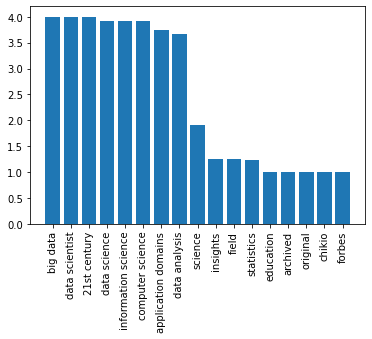

In [8]:
import  matplotlib.pyplot as plt

def plot(pair_list):
    k, v = zip(*pair_list)
    plt.bar(range(len(k)), v)
    plt.xticks(range(len(k)), k, rotation='vertical')
    plt.show()

plot(res)

There is, however, even better way to visualize word frequencies - using <b>Word Cloud</b>. We will need to install another library to plot the word cloud from our keyword list.

In [9]:
!{sys.executable} -m pip install wordcloud

WordCloud object is responsible for taking in either original text, or pre-computed list of words with their frequencies, and returns an image, which can then be displayed using matplotlib

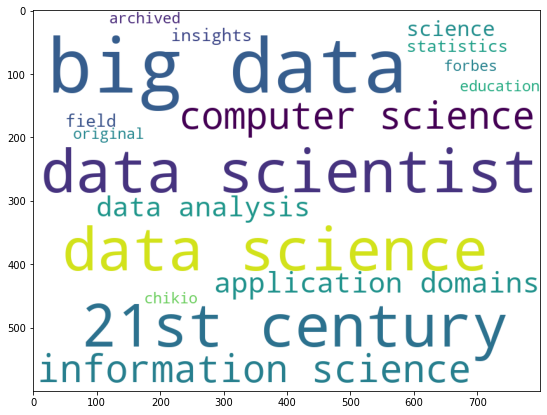

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wc = WordCloud(background_color="white", width=800, height=600)
plt.figure(figsize=(15, 7))
plt.imshow(wc.generate_from_frequencies({k:v for k, v in res}))

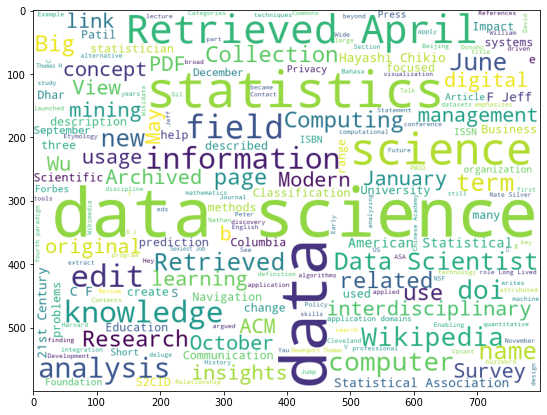

In [11]:
plt.figure(figsize=(15, 7))
plt.imshow(wc.generate(text))